In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [3]:
import os  
cwd = os.getcwd()
print("Current working directory:", cwd)

Current working directory: /Users/dahai/Library/CloudStorage/OneDrive-Personal/NUS/Project


In [4]:
#Reading data files
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
#Check the summary of the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#Check for null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From the results above, the features with missing entries are Age, Cabin and Embarked

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Features (incomplete)

The first step is to determine what features are more related to the outcome (survival)

There are several variables:

PassengerId: An unique id isssued to passengers

Pclass: Ticket class. 1, 2 and 3 stands for class one, two and three respectively 

Name: Passenger's name. 

Sex: Passenger's binary sex

Age: Passenger's age. "NaN" indicates a not-recorded value

SibSp: Number of siblings or spouses travelling with each passenger.

Parch: Number of parents of children travelling with each passenger.

Ticket: Ticket number. Presumably random.

Fare: How much money the passenger has paid for the travel journey.

Cabin: Cabin number of the passenger. "NaN" Indicates a not-recorded cabin number

Embarked: Port from where the particular passenger was embarked/boarded.

Output:

Survived: Shows if the passenger survived or not. 1 stands for survived and 0 stands for not survived.

## Presumptions
By intuition, cabin number does not contribute to survival
Pasenger ID is also the case, since it is a mere identifier. 

It should be noted that, should a feature has no effect on the survival, then when plotting this feature against 'Survived", the two bars Indicating the number of survived/dead passengers should be of similar heights

## Pclass and Survival

In [11]:
survivePclass = train.groupby("Survived").Pclass.value_counts()
survivePclass

Survived  Pclass
0         3         372
          2          97
          1          80
1         1         136
          3         119
          2          87
Name: Pclass, dtype: int64

In [12]:
allPclass = train.Pclass.value_counts(normalize=True)
allPclass

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

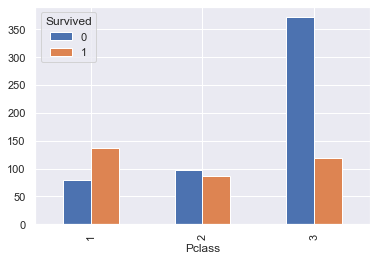

In [13]:
survivePclass.unstack(level=0).plot(kind='bar', subplots=False)

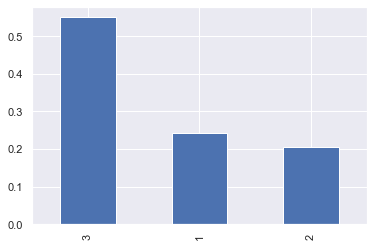

In [14]:
allPclass.plot(kind='bar', subplots=False)

It can be therefore concluded that people who are of a higher pclass (smaller pclass value) have a better chance of survival

## Sex and Survival

In [15]:
surviveSex = train.groupby("Survived").Sex.value_counts()
surviveSex

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

In [16]:
#It should be noted that the sex distribution of the passengers are not 1:1
allSex = train.Sex.value_counts(normalize=True)
allSex

male      0.647587
female    0.352413
Name: Sex, dtype: float64

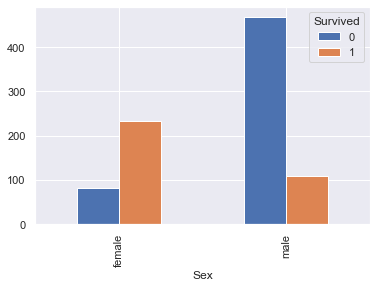

In [17]:
surviveSex.unstack(level=0).plot(kind='bar', subplots=False)

## Age and Survival

In [18]:
surviveAge = train.groupby("Survived").Age.value_counts()
allAge = train.Age.value_counts()

In [19]:
allAge

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [20]:
surviveAge

Survived  Age 
0         21.0    19
          28.0    18
          18.0    17
          25.0    17
          19.0    16
                  ..
1         43.0     1
          47.0     1
          53.0     1
          55.0     1
          80.0     1
Name: Age, Length: 142, dtype: int64

In [21]:
surviveAge[1] #This is the number of people who survived, grouped by age

Age
24.0    15
22.0    11
27.0    11
35.0    11
36.0    11
        ..
43.0     1
47.0     1
53.0     1
55.0     1
80.0     1
Name: Age, Length: 65, dtype: int64

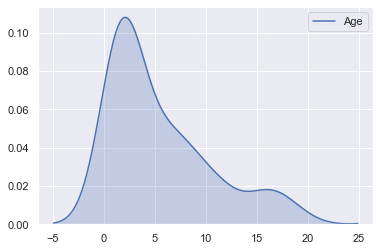

In [22]:
sns.kdeplot(surviveAge[0],shade=True)

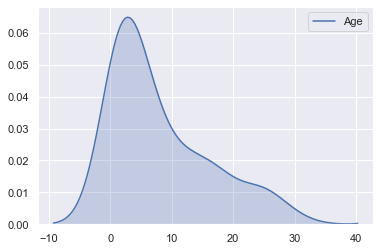

In [23]:
sns.kdeplot(allAge,shade=True)

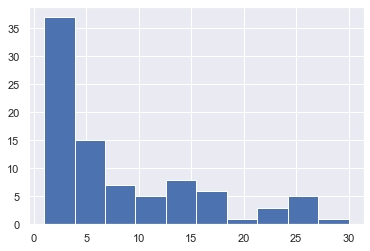

In [24]:
allAge.hist()

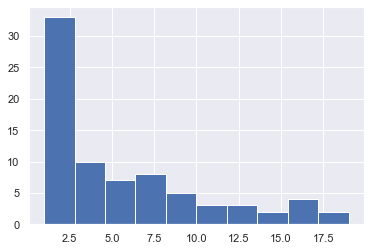

In [25]:
surviveAge[0].hist()

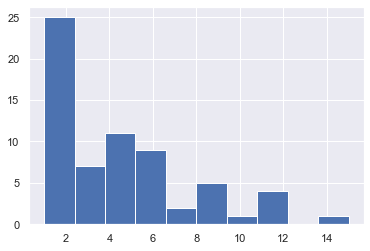

In [26]:
surviveAge[1].hist()

# Data Processing and Modelling

In [27]:
trainDat = train
testDat = test
temp = [trainDat, testDat]
combineDat = pd.concat(temp)

## Sex

In [28]:
#Sex feature: use 0 for female and 1 for male
trainDat["Sex"] = trainDat["Sex"].map({"female": 0, "male": 1})
testDat["Sex"] = testDat["Sex"].map({"female": 0, "male": 1})

## Age

In [29]:
trainDat['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [30]:
'''We shall use the following ranges: (based on standard deviation, all values inclusive)
    0 - 14 = 0
    15 - 28 = 1
    29 - 43 = 2
    44 - 58 = 3
    59 - 73 = 4
    >73 = 5
    All NaN are considered in range 2
    '''
testDat['Age'] = testDat['Age'].fillna(29.7)
trainDat['Age'] = trainDat['Age'].fillna(29.7)
testDat['AgeLabel'] = pd.cut(x=testDat['Age'], bins=[0, 14, 28, 43, 58, 73, 81],
                     labels=[0, 1, 2, 3, 4, 5])
trainDat['AgeLabel'] = pd.cut(x=trainDat['Age'], bins=[0, 14, 28, 43, 58, 73, 81],
                     labels=[0, 1, 2, 3, 4, 5])

In [31]:
#testDat.head()

In [32]:
#trainDat.head()

## Embarked (Port)

In [33]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [34]:
test["Embarked"].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [35]:
#We will replace all the NaN values with the most commonly occuring value: S
trainDat['Embarked'] = trainDat['Embarked'].fillna('S')
testDat['Embarked'] = testDat['Embarked'].fillna('S')

trainDat["Embarked"] = trainDat["Embarked"].map({"S": 0, "C": 1, "Q": 2})
testDat["Embarked"] = testDat["Embarked"].map({"S": 0, "C": 1, "Q": 2})

## Fare

In [36]:
testDat['Fare'].describe()
#We would therefore use $50 intervals to label Fare

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [37]:
testDat['Fare'] = testDat['Fare'].fillna(32.2)
trainDat['Fare'] = trainDat['Fare'].fillna(32.2)
testDat['FareLabel'] = pd.cut(x=testDat['Fare'], bins=[-1, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550],
                     labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
trainDat['FareLabel'] = pd.cut(x=trainDat['Fare'], bins=[-1, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550],
                     labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Feature Selection and Modelling

It has been decided that the following would be used for prediction:

Pclass: Ticket class. 1, 2 and 3 stands for class one, two and three respectively 

Name: Passenger's name. 

Sex: Passenger's binary sex

Age: Passenger's age. "NaN" indicates a not-recorded value

Fare: How much money the passenger has paid for the travel journey.

Embarked: Port from where the particular passenger was embarked/boarded.

(5 in total)

In [38]:
trainDat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeLabel,FareLabel
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,2,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,2,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,2,0


In [39]:
testDat.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeLabel,FareLabel
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,2,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,0,3,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,2,4,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,0,1,0


In [40]:
###Importing models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [41]:
toDrop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', "Age", "Fare"]
trainDatFinal = trainDat.drop(toDrop, axis=1)
testDatFinal = testDat.drop(toDrop, axis=1)
trainDatFinal = trainDatFinal.drop(['PassengerId'], axis=1)

In [42]:
trainDatFinal.head()

,Survived,Pclass,Sex,Embarked,AgeLabel,FareLabel
0,0,3,1,0,1,0
1,1,1,0,1,2,1
2,1,3,0,0,1,0
3,1,1,0,0,2,1
4,0,3,1,0,2,0


In [43]:
trainDat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeLabel,FareLabel
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,2,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,2,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,2,0


In [44]:
trainIn = trainDatFinal.drop('Survived', axis=1)
trainOut = trainDatFinal['Survived']
testIn = testDatFinal.drop("PassengerId", axis=1).copy()

In [45]:
testIn.head()

,Pclass,Sex,Embarked,AgeLabel,FareLabel
0,3,1,2,2,0
1,3,0,0,3,0
2,2,1,2,4,0
3,3,1,0,1,0
4,3,0,0,1,0


In [57]:
#logistic regression
lr = LogisticRegression()
lr.fit(trainIn, trainOut)
lrPred = lr.predict(trainIn)
accuracy = round( lr.score(trainIn, trainOut) * 100, 2)
print(f"Accuracy: {str(accuracy)}%")

Accuracy: 80.58%


In [59]:
#kth nearest neighbour
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(trainIn, trainOut)
knnPred = knn.predict(trainIn)
accuracy = round(knn.score(trainIn, trainOut) * 100, 2)
print(f"Accuracy: {str(accuracy)}%")

Accuracy: 81.14%


In [66]:
#Decision tree method
DT = DecisionTreeClassifier()
DT.fit(trainIn, trainOut)
DTPred = DT.predict(trainIn)
accuracy = round(DT.score(trainIn, trainOut) * 100, 2)
print(f"Accuracy: {str(accuracy)}%")

Accuracy: 84.18%


### Create confusion matrix: further evaulation of the three models

In [65]:
from sklearn.metrics import confusion_matrix
#Logistic regression model
cMatrix = confusion_matrix(trainOut, lrPred, normalize = 'true')
np.set_printoptions(precision=4)
cMatrix

array([[0.867 , 0.133 ],
       [0.2924, 0.7076]])

In [67]:
#knn model
cMatrix = confusion_matrix(trainOut, knnPred, normalize = 'true')
np.set_printoptions(precision=4)
cMatrix

array([[0.9308, 0.0692],
       [0.3801, 0.6199]])

In [68]:
#Decision Tree model
cMatrix = confusion_matrix(trainOut, DTPred, normalize = 'true')
np.set_printoptions(precision=4)
cMatrix

array([[0.9526, 0.0474],
       [0.3363, 0.6637]])

It can be therefore concluded, from the results above, that the decision tree method is able to achieve the highest accuracy. 

In addition, it is also interesting to note that the decision tree model has a higher True Positive and True Negative rate compared with the knn model, while achieveing a lower Flase Positive and False Negative rate, meaning that the former performs better than the latter.

However, when compared with the logistic regression model, the decision tree has a lower True Negative rate, and a slightly higher False Positive rate. Nevertheless, we still consider the decision tree model to be the best-performing model out of the three.

We shall therefore use the decision tree method to produce predictions to Kaggle.

In [52]:
testIn.head()

,Pclass,Sex,Embarked,AgeLabel,FareLabel
0,3,1,2,2,0
1,3,0,0,3,0
2,2,1,2,4,0
3,3,1,0,1,0
4,3,0,0,1,0


In [55]:
#Submission creatation to Kaggle
testOut = DT.predict(testIn)
final = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": testOut
    })

final.to_csv('gender_submission.csv', index=False)